# Image Augmentation with Convolutional Neural Networks

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 74s 0us/step


In [3]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


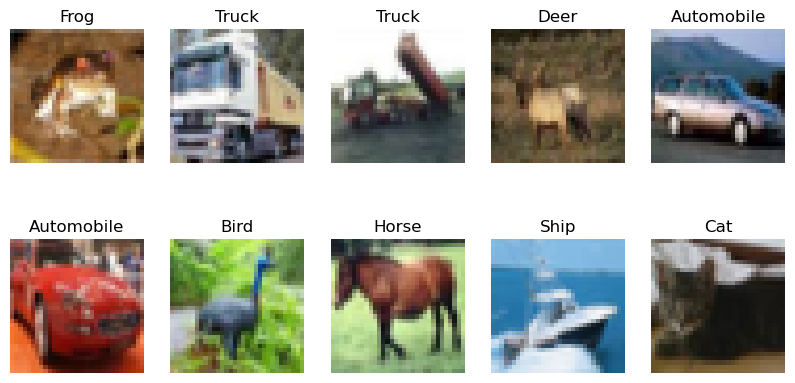

In [4]:
# Display sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.15,        # Randomly shear images
    zoom_range=0.15,         # Randomly zoom into images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill pixels for transformations
)

In [6]:
# Fit the generator on training data
datagen.fit(X_train)

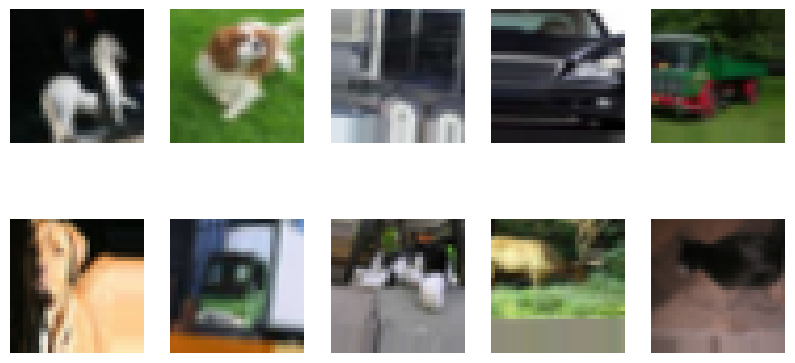

In [7]:
# Visualize augmented images
augmented_images, _ = next(datagen.flow(X_train, y_train, batch_size=10))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

In [8]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [11]:
# Train the model using the data generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
782/782 [==============================] - 82s 99ms/step - loss: 1.9047 - accuracy: 0.1203 - val_loss: 1.5449 - val_accuracy: 0.0911
Epoch 2/10
782/782 [==============================] - 77s 99ms/step - loss: 1.6408 - accuracy: 0.0939 - val_loss: 1.3452 - val_accuracy: 0.0681
Epoch 3/10
782/782 [==============================] - 77s 98ms/step - loss: 1.5324 - accuracy: 0.0920 - val_loss: 1.2383 - val_accuracy: 0.1036
Epoch 4/10
782/782 [==============================] - 78s 99ms/step - loss: 1.4640 - accuracy: 0.0940 - val_loss: 1.2609 - val_accuracy: 0.0637
Epoch 5/10
782/782 [==============================] - 77s 98ms/step - loss: 1.4129 - accuracy: 0.0942 - val_loss: 1.1203 - val_accuracy: 0.0864
Epoch 6/10
782/782 [==============================] - 75s 96ms/step - loss: 1.3766 - accuracy: 0.0964 - val_loss: 1.1499 - val_accuracy: 0.0693
Epoch 7/10
782/782 [==============================] - 78s 100ms/step - loss: 1.3484 - accuracy: 0.0983 - val_loss: 1.0847 - val_accuracy

In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 5s 17ms/step - loss: 1.1841 - accuracy: 0.0776
Test Accuracy: 7.76%


In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

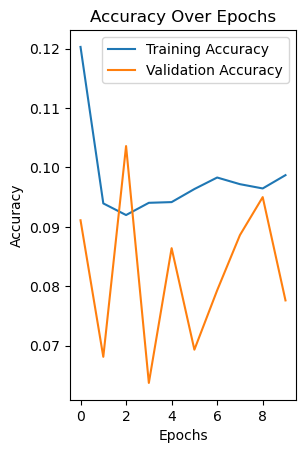

In [14]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

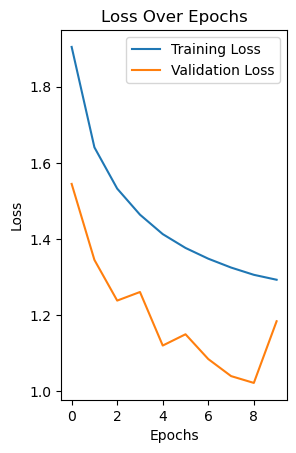

In [15]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
import numpy as np
# Pick a random test image
index = 0  # Change this index to test different images
test_image = X_test[index]
true_label = y_test[index][0]


In [19]:
# Expand dimensions to match the model input
test_image_reshaped = np.expand_dims(test_image, axis=0)

In [20]:
# Predict the class
predicted_probabilities = model.predict(test_image_reshaped)
predicted_class = np.argmax(predicted_probabilities)

1/1 [==============================] - 0s 203ms/step


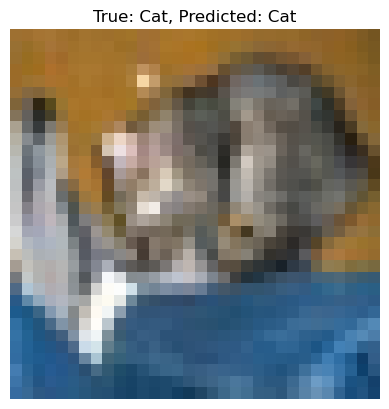

In [21]:
# Display the image and prediction
plt.imshow(test_image)
plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()